In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df["country"].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df["country"]= df["country"].fillna("United States")

In [ ]:
df.drop(["show_id"], axis =1, inplace=True)

In [ ]:
df[df.duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

In [ ]:
types = df['type'].value_counts().reset_index()
types

,index,type
0,Movie,6131
1,TV Show,2676


In [ ]:
directors = df.groupby(['director', 'type']).size().reset_index(name='count')
directors

,director,type,count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4571,Çagan Irmak,Movie,1
4572,Ísold Uggadóttir,Movie,1
4573,Óskar Thór Axelsson,Movie,1
4574,Ömer Faruk Sorak,Movie,2


In [ ]:
top_10_directors = df.groupby(['director', 'type']).size().sort_values(ascending=False).iloc[2:12].reset_index(name='count')
top_10_directors

,director,type,count
0,Suhas Kadav,Movie,16
1,Marcus Raboy,Movie,15
2,Jay Karas,Movie,14
3,Cathy Garcia-Molina,Movie,13
4,Jay Chapman,Movie,12
5,Youssef Chahine,Movie,12
6,Martin Scorsese,Movie,12
7,Steven Spielberg,Movie,11
8,Don Michael Paul,Movie,10
9,David Dhawan,Movie,9


In [ ]:
countries = df.groupby(['country', 'type']).size().reset_index(name='count')
countries

,country,type,count
0,", France, Algeria",Movie,1
1,", South Korea",TV Show,1
2,Argentina,Movie,38
3,Argentina,TV Show,18
4,"Argentina, Brazil, France, Poland, Germany, De...",Movie,1
...,...,...,...
842,Venezuela,Movie,1
843,"Venezuela, Colombia",Movie,1
844,Vietnam,Movie,7
845,West Germany,Movie,1


In [ ]:
top_10_countries = df.groupby(['country', 'type'])['country'].value_counts().sort_values(ascending=False).head(10)
top_10_countries


country         type     country       
United States   Movie    United States     2498
                TV Show  United States     1151
India           Movie    India              893
United Kingdom  TV Show  United Kingdom     213
                Movie    United Kingdom     206
Japan           TV Show  Japan              169
South Korea     TV Show  South Korea        158
Canada          Movie    Canada             122
Spain           Movie    Spain               97
Egypt           Movie    Egypt               92
Name: country, dtype: int64

In [ ]:
top_10_TV_Show_countries = countries[countries['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_countries

,country,type,count
686,United States,TV Show,1151
581,United Kingdom,TV Show,213
362,Japan,TV Show,169
499,South Korea,TV Show,158
285,India,TV Show,79
554,Taiwan,TV Show,68
68,Canada,TV Show,59
185,France,TV Show,49
18,Australia,TV Show,48
510,Spain,TV Show,48


In [ ]:
top_10_movie_countries = countries[countries['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_countries

,country,type,count
685,United States,Movie,2498
284,India,Movie,893
580,United Kingdom,Movie,206
67,Canada,Movie,122
509,Spain,Movie,97
171,Egypt,Movie,92
420,Nigeria,Movie,86
307,Indonesia,Movie,77
564,Turkey,Movie,76
361,Japan,Movie,76


In [ ]:
release_years = df.groupby(['release_year', 'type']).size().reset_index(name='count')
release_years

,release_year,type,count
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [ ]:
ratings = df.groupby(['rating', 'type']).size().reset_index(name='count')
ratings

,rating,type,count
0,66 min,Movie,1
1,74 min,Movie,1
2,84 min,Movie,1
3,G,Movie,41
4,NC-17,Movie,3
5,NR,Movie,75
6,NR,TV Show,5
7,PG,Movie,287
8,PG-13,Movie,490
9,R,Movie,797


In [ ]:
types = df['type'].value_counts().reset_index()
types

,index,type
0,Movie,6131
1,TV Show,2676


<Figure size 2000x1000 with 0 Axes>

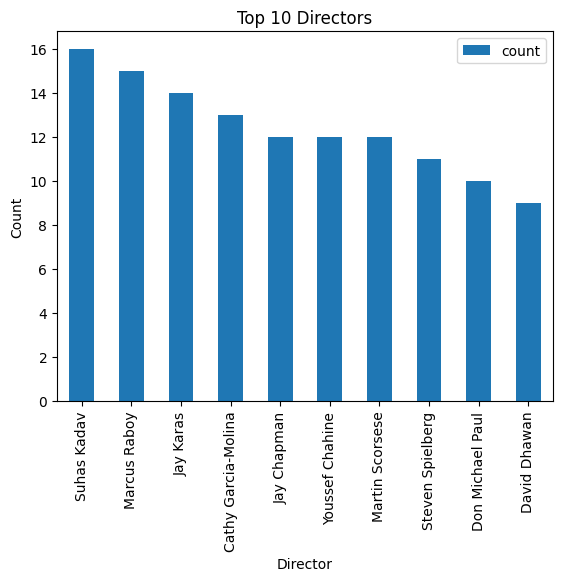

In [55]:
#visualizing the director column
plt.figure(figsize=(20, 10))
top_10_directors.plot(x='director', y='count', kind='bar')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

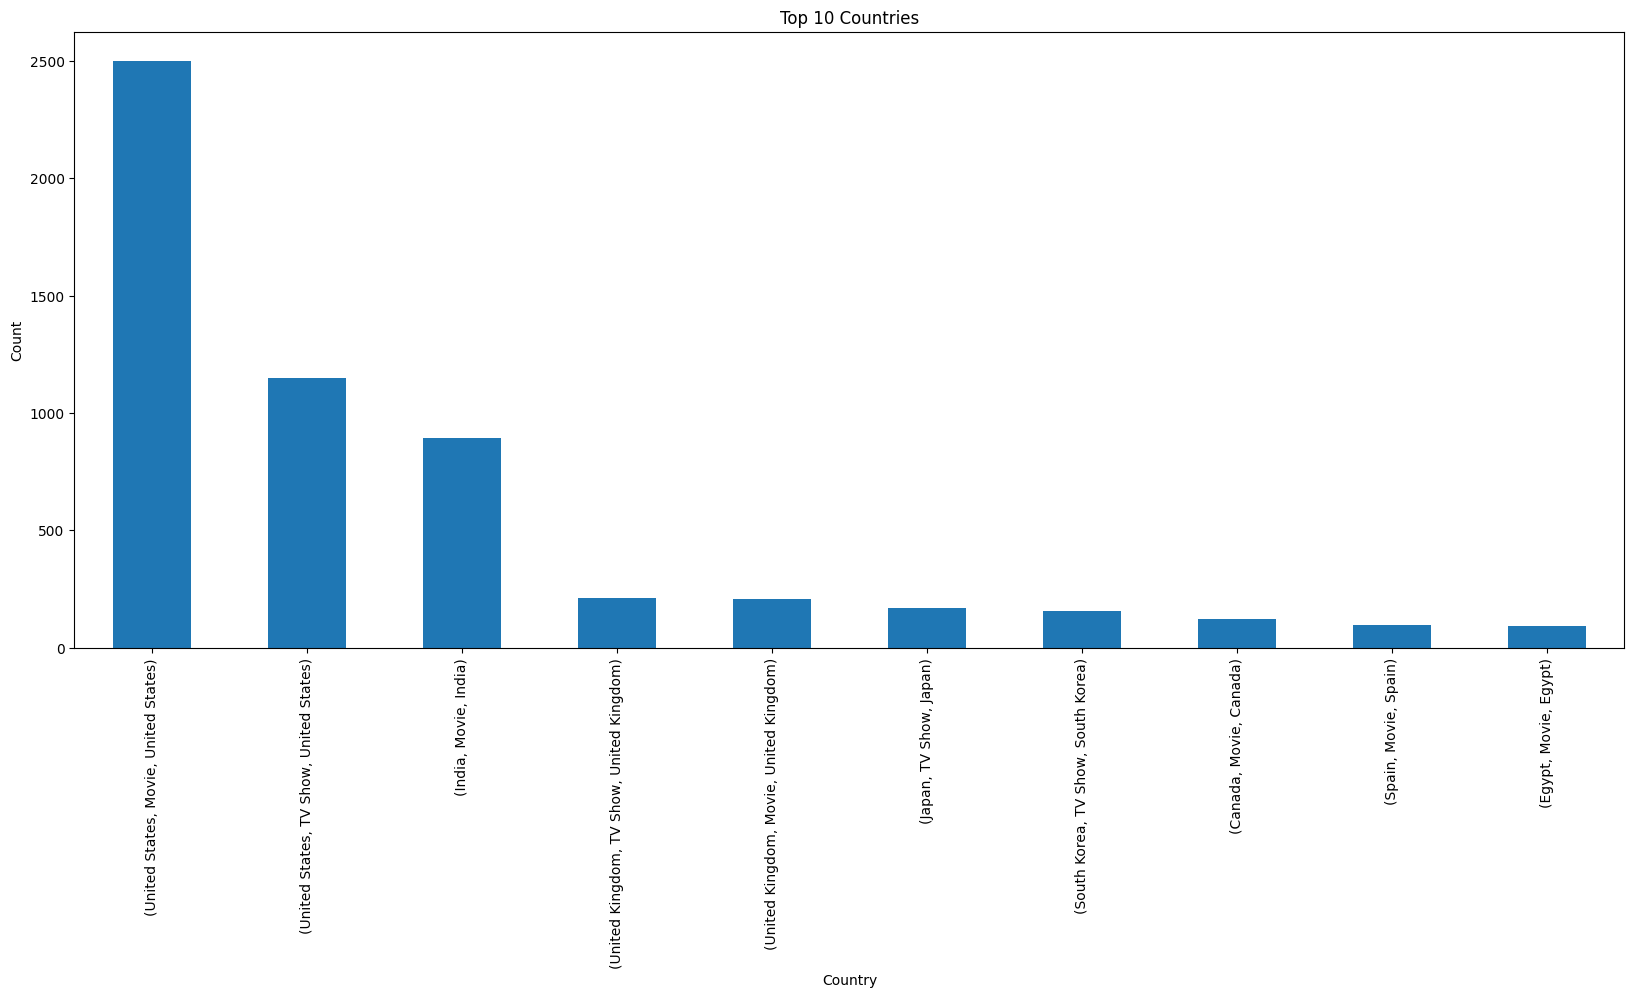

In [56]:
plt.figure(figsize=(20, 8))
top_10_countries.plot(x='country', y='country', kind='bar')
plt.title("Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

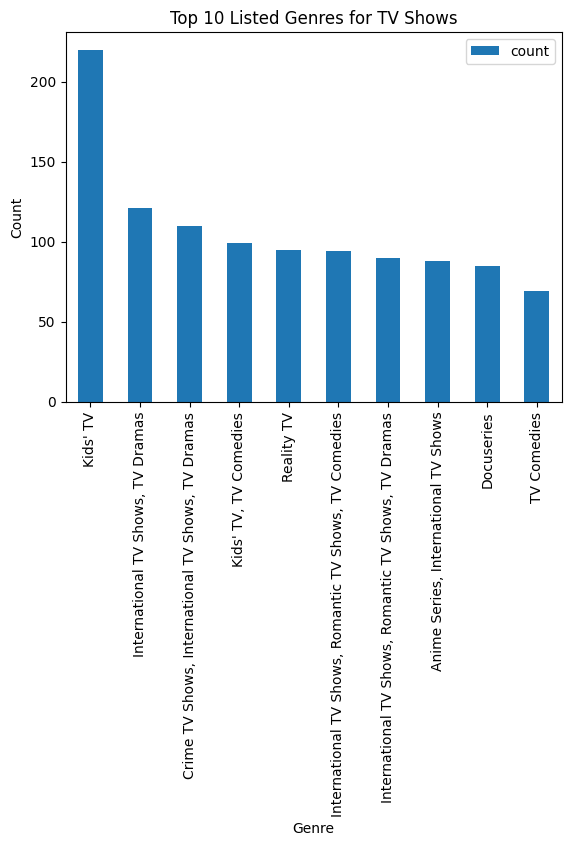

In [59]:
listed_in = df.groupby(['listed_in', 'type']).size().reset_index(name='count')

top_10_listed_in_TV_Show = listed_in[listed_in['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_listed_in_TV_Show.plot(x='listed_in', y='count', kind='bar')
plt.title('Top 10 Listed Genres for TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

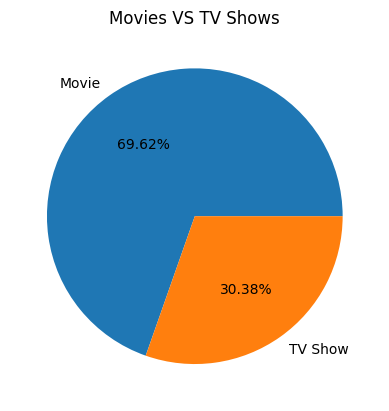

In [61]:
types = df['type'].value_counts().reset_index()
types.columns = ['type', 'count']  # Rename the columns for clarity
types.plot.pie(y='count', labels=types['type'], autopct='%.2f%%', legend=None)
plt.title("Movies VS TV Shows")
plt.ylabel("")  # Removing y-label
plt.show()

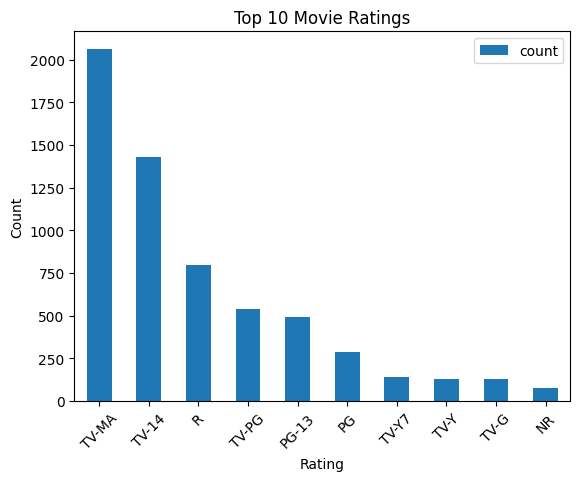

In [62]:
top_10_movies_ratings = ratings[ratings['type'] == 'Movie'].sort_values(by= 'count',ascending=False).iloc[0:10]
top_10_movies_ratings.plot(x='rating', y='count', kind='bar')
plt.title('Top 10 Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()